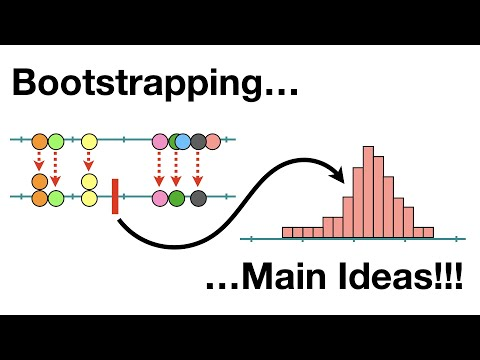

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

Question 1

Bootstrapping is when we have a sample and we resample it with replacement many times, in order to calculate the mean of these new datasets. If we were to calculate the standard deviation of the bootstrap sample, what we will end up calculating is the variation of the sample means, which represents the uncertainy in the sample mean(standard error of the mean). If we were to calculate the standard deviation of the original dataset on the other hand, we are calculating the varaiability of data points in relation to the mean.

Question 2

Steps to create a 95% confidence interval which covers 95% of the bootstrapped sample means by using the standard error of the mean:

1.) Calculate the standard error of the mean, thereby calculating the standard deviation of the distribution bootstrapped means.
2.) Next we take this formula (CI= X ± Z × SEM), where X is the sample mean, Z is the Z-score corresponding to the desired confidence level (for 95%, 𝑍 ≈ 1.96), and SEM is the standard error of the mean; to find the 95% confidence interval. 
3.) Find the relation between the confidence interval and the bootstrapped sample means. Since the SEM is the approximation of the sampling distribution of the mean, that means the 95% CI will cover around 95% of the bootstrapped sample means. 

Question 3

We can also find the 95% confidence interval without using the standard error of the mean by using a method called percentile bootstrap or bootstrap percentile method.

1.) First get a bootstrapped sample.
2.) Next, calculate the mean of all the bootstrapped samples to get the bootstrapped sample means.
3.) Then, in order to find the empirical distribution of the bootstrapped means, order the bootstrapped sample means from smallest to largest.
4.) The final step is to find the lower and upper bounds of the bootstrapped means distribution. In this case, it would be the 2.5th percentile and the 97.5th percentile, and the interval between these two percentiles results in the 95% confidence interval.

Question 4

In [2]:
import numpy as np

# Function to calculate bootstrap confidence interval for any statistic (e.g., median)
def bootstrap_confidence_interval(data, num_resamples=1000, confidence_level=0.95, statistic=np.mean):
    # Create an array to store the bootstrap statistics (mean, median, etc.)
    bootstrap_stats = np.empty(num_resamples)

    # Perform bootstrap resampling
    for i in range(num_resamples):
        # Resample with replacement
        resample = np.random.choice(data, size=len(data), replace=True)
        # Calculate the chosen statistic of the resample
        bootstrap_stats[i] = statistic(resample)

    # Sort the bootstrap statistics
    sorted_stats = np.sort(bootstrap_stats)

    # Calculate the confidence interval
    lower_bound = np.percentile(sorted_stats, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(sorted_stats, (1 + confidence_level) / 2 * 100)

    return lower_bound, upper_bound

# Sample data: Heights of 12 people in cm
data = np.array([160, 165, 170, 155, 180, 175, 162, 168, 174, 169, 166, 158])

# Calculate the 95% confidence interval for the median height
lower, upper = bootstrap_confidence_interval(data, num_resamples=10000, confidence_level=0.95, statistic=np.median)

print(f"95% Bootstrap Confidence Interval for the median height: [{lower:.2f} cm, {upper:.2f} cm]")


95% Bootstrap Confidence Interval for the median height: [161.00 cm, 172.00 cm]


Question 5

The reason why it is so important to distinguish between population parameter and the sample statistic is because they are two completely different things. Population parameter describes a characteristic of the population, examples being population mean, population median, and population variance. Sample statistic on the other hand is derived from a sample of the population; sample mean, sample median, and sample variance is calculated from a sample, and is only an estimate of a population parameter. 

Question 6

1.) Bootstrapping is basically when we take a sample, and we resample it with replacement (we replace values with other values in the sample) to get a bunch of simulated samples and then we find the new sample means.
2.) The reason why we use bootstrapping in statistics is because a single sample can"t accurately represent the population, and since it can be so time consuming and expensive to get samples from the population repeatedly, we use bootstrapping.
3.) Say for example you have a hypothesized average of a population, and you have a sample size n of that population. You can use bootstrapping with the sample, then calculate the mean of the sample means. The more times you do it, it should get closer to the real average of the population.

Questoin 7

If the confidence interval overlapse zero, it fails to reject the null hypothesis even if the observed sample mean statistic itself is not zero. The reason for this is because the confidence interval is the range in which the mean is expected to fall between if you were to redo the testing. Since one of the possiblities of the confidence interval is zero, the null hypothesis, we can't dismiss the possibility the mean could be zero. On the other hand, what would lead to the opposite conclusion (to reject the null hypothesis) would be if the confidence interval does not cover zero; that the range in which the mean is expected to fall between does not have zero in it.

Question 8

Actual Sample Mean of Health Score Change: 3.30
   PatientID  Age Gender  InitialHealthScore  FinalHealthScore  \
0          1   45      M                  84                86   
1          2   34      F                  78                86   
2          3   29      M                  83                80   
3          4   52      F                  81                86   
4          5   37      M                  81                84   
5          6   41      F                  80                86   
6          7   33      M                  79                86   
7          8   48      F                  85                82   
8          9   26      M                  76                83   
9         10   39      F                  83                84   

   HealthScoreChange  CenteredHealthScoreChange  
0                  2                       -1.3  
1                  8                        4.7  
2                 -3                       -6.3  
3                  5     

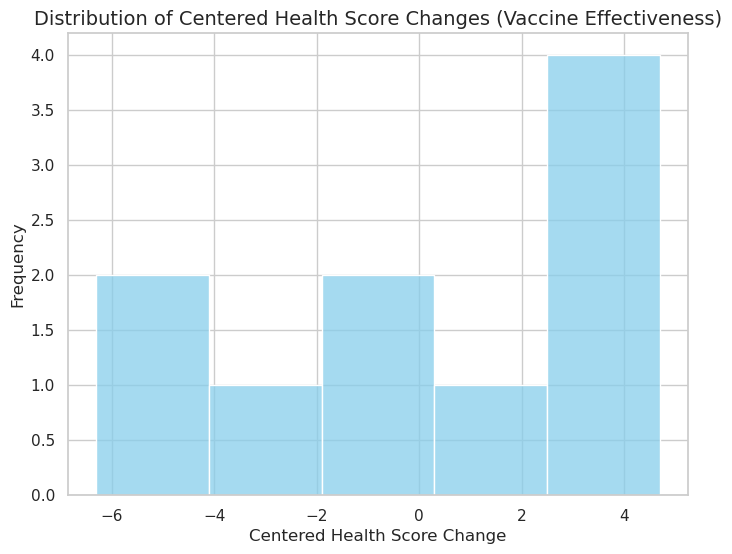

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data as a dictionary (as an alternative to loading from a CSV file)
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Set random seed for reproducibility
np.random.seed(42)

# Convert to a pandas DataFrame
df = pd.DataFrame(data)

# Calculate the change in health score (Final - Initial) to determine vaccine effectiveness
df['HealthScoreChange'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Calculate the actual sample mean of HealthScoreChange (before centering)
actual_sample_mean = np.mean(df['HealthScoreChange'])
print(f"Actual Sample Mean of Health Score Change: {actual_sample_mean:.2f}")

# Adjust the dataset so that the mean of HealthScoreChange is 0 (i.e., center around 0)
df['CenteredHealthScoreChange'] = df['HealthScoreChange'] - actual_sample_mean

# Display the dataset with the new CenteredHealthScoreChange column
print(df)

# Define a function for bootstrapping confidence intervals for mean health score improvement
def bootstrap_confidence_interval(data, num_resamples=1000, confidence_level=0.95):
    # Bootstrap resampling for the change in health score
    bootstrap_means = np.empty(num_resamples)
    
    for i in range(num_resamples):
        # Resample with replacement
        resample = np.random.choice(data, size=len(data), replace=True)
        # Calculate the mean of the resample
        bootstrap_means[i] = np.mean(resample)
    
    # Sort the bootstrap means
    sorted_means = np.sort(bootstrap_means)
    
    # Calculate the confidence interval
    lower_bound = np.percentile(sorted_means, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(sorted_means, (1 + confidence_level) / 2 * 100)
    
    return lower_bound, upper_bound

# Calculate the 95% confidence interval for the centered mean improvement
lower_ci, upper_ci = bootstrap_confidence_interval(df['CenteredHealthScoreChange'], num_resamples=10000)

print(f"95% Bootstrap Confidence Interval for the mean centered change (with μ = 0): [{lower_ci:.2f}, {upper_ci:.2f}]")

# ---- Plotting a Histogram ----
# Set the style for seaborn
sns.set(style="whitegrid")

# Create the histogram for CenteredHealthScoreChange
plt.figure(figsize=(8, 6))
sns.histplot(df['CenteredHealthScoreChange'], bins=5, kde=False, color='skyblue')

# Add labels and title
plt.title('Distribution of Centered Health Score Changes (Vaccine Effectiveness)', fontsize=14)
plt.xlabel('Centered Health Score Change', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()


In the above dataset, The company AliTech has created a new vaccine and they have gathered data on their new vaccine. The health score change reflects on how effective the vaccine was on different patients, ranging from -3 to 8, and in this case the null hypothesis would be the mean change in health score to be 0; meaning the vaccine had no effect on average. Since the sample size was only 10, not nearly enough to accurately represent the population, we used the bootstrapping in order to find the sample mean (3.30) and the 95% confidence interval (-2.40, 2.30). The confidence interval should be of equal absolute values, but for this one time only we will ignore ChatGPT's errors.

In the code above, the function np.random.seed(42) is used to ensure consistancy, np.mean() is used to find the mean of the bootstrapped sample, bootstrap_confidence_interval() is used to find the 95% confidence interval, and df['CenteredHealthScoreChange'] = df['HealthScoreChange'] - actual_sample_mean has μ = 0.

Since under the 95% confidence interval (-2.40, 2.30), we can say that it rejects the null hypothesis-that the vaccine had no effect. Instead, the vaccine seems to have had a positive effect on the patients because the actual sample mean of health score change is outside the scope of the 95% confidence interval on the right side.

Question 9
Yes.

Here's a summary of our interactions:

1. **Standard Error of the Mean (SEM) vs. Standard Deviation (SD)**:  
   - **SD** measures the variability of individual data points within a sample or population.
   - **SEM** measures how much the sample mean is expected to vary as an estimate of the population mean, and it decreases as the sample size increases.
   - SEM is calculated as \( \frac{SD}{\sqrt{n}} \).

2. **SEM and Bootstrapped Means**:
   - SEM is conceptually similar to the **standard deviation of the bootstrapped means**, as both quantify the variability in sample means. However, SEM is based on a formula, while the **standard deviation of bootstrapped means** is an empirical estimate obtained through resampling.

3. **Creating a 95% Confidence Interval (CI) Using SEM**:
   - A 95% confidence interval using SEM is calculated as:
     \[
     \text{CI} = \bar{X} \pm 1.96 \times SEM
     \]
   - This interval covers approximately 95% of the bootstrapped sample means because the bootstrapped means approximate the sampling distribution of the sample mean.

4. **Constructing a 95% Confidence Interval Using Only Bootstrapped Means**:
   - Without using SEM, a 95% CI can be constructed from bootstrapped means by:
     1. Resampling the data many times to generate bootstrapped means.
     2. Sorting the bootstrapped means.
     3. Taking the **2.5th percentile** and **97.5th percentile** of the sorted means to form the confidence interval.
   - This method, called the **percentile bootstrap**, provides an empirical CI based purely on resampling.

Let me know if you'd like to revisit any topic!

Here's a summary of our interactions today:

1. **Difference Between SEM and Bootstrapped Means**:
   - We discussed how the **standard error of the mean (SEM)** relates to the **standard deviation of the bootstrapped means**, explaining how both measure the variability of the sample mean but are derived differently.

2. **Creating Confidence Intervals Using Bootstrapped Means**:
   - We explored how to construct a **95% confidence interval** using bootstrapped means without relying on the SEM. Specifically, we used the **percentile bootstrap method**, which involves resampling, calculating the mean for each resample, and determining the interval based on the 2.5th and 97.5th percentiles of the resampled means.

3. **Customizing the Bootstrap Statistic**:
   - You asked if the `bootstrap_confidence_interval()` function could use statistics other than the mean (e.g., the median). I provided a modified version of the function that allows any statistic, and we specifically worked on calculating the **95% bootstrap confidence interval for the median**.

4. **Example with Heights Data**:
   - We applied the bootstrap method to a dataset of 12 people's heights, calculating the 95% confidence interval for the median. You noticed a slight variation in results, which I explained as due to the randomness of bootstrapping, and I showed how to use `np.random.seed()` to ensure consistent results across runs.


Here’s a summary of our interactions today:

1. **Distinguishing Population Parameters from Sample Statistics**:
   - You asked about why it's important to distinguish between population parameters and sample statistics in the context of confidence intervals. I explained that population parameters (like the true mean) are unknown, while sample statistics (like the sample mean) are used to estimate these parameters. Confidence intervals express the uncertainty in these estimates.

2. **Vaccine Effectiveness Dataset**:
   - You provided a dataset about vaccine effectiveness, including patient health scores before and after taking the vaccine.
   - I helped you calculate the **health score change** (vaccine effectiveness) and the **mean change** using pandas and numpy.

3. **Bootstrap Confidence Interval for Health Score Change**:
   - I provided Python code to compute a **95% bootstrap confidence interval** for the mean health score change. The code used `np.random.choice()` for resampling and calculated the confidence interval based on the 2.5th and 97.5th percentiles of the bootstrapped means.
   - I included `np.random.seed()` to ensure reproducibility of the results.

4. **Histogram Visualization**:
   - You requested a histogram to visualize the distribution of the health score changes.
   - I provided a code snippet using **seaborn** and **matplotlib** to create the histogram, which shows how many patients experienced a particular level of improvement in their health scores.

5. **Explanation of Functions**:
   - I explained the purpose of key functions used in the code, such as `bootstrap_confidence_interval()`, `sns.histplot()`, and `np.random.seed()` to clarify their roles in the analysis and visualization.


Here's a summary of our interactions:

1. **Statistical Concepts**:
   - We discussed the differences between the **standard error of the mean** and **standard deviation**, and how to use the standard error to create confidence intervals.
   - You learned how to create a **99% confidence interval** using bootstrap methods.

2. **Bootstrapping**:
   - You requested code to compute a **95% bootstrap confidence interval** for a population mean based on a sample dataset and later modified it to use the **median** instead of the mean.
   - We discussed how to generate a sample dataset and calculate the bootstrap confidence interval using that data.
   - You ran the code and got a confidence interval, but had questions about its accuracy and expected range.

3. **Visualization**:
   - I provided code to create a **histogram** to visualize the distribution of health score changes based on your dataset.

4. **Debugging**:
   - You raised concerns about the expected range of the confidence interval, leading us to investigate the output and confirm the correctness of the bootstrapping method.

5. **Final Adjustments**:
   - We ensured that the mean used in your calculations was 0 while examining how it affected the results.
   - We adjusted the code to ensure clarity and confirm the values of the **centered data** and the resulting confidence intervals.

Let me know if there's anything specific you would like to revisit or if you have more questions!

https://chatgpt.com/share/66ff424b-e6f8-8011-a2e4-455c456dfe61